<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Naive Bayes

## Table of Content
1. [Introduction to Naive Bayes](#section1)<br>
    - 1.1 [Condiitonal Probability](#section101)<br>
    - 1.2 [Bayes Rule](#section103)<br>
    - 1.3 [Mathematics](#section103)<br>
    - 1.4 [Explanation through example](#section104)<br>
    - 1.5 [Is naive Bayes really good?](#section105)<br>
2. [Use Case - Credit card fraud detection](#section2)<br>
3. [Data loading and description](#section3)<br>
4. [Data Interpretation and Visualization](#section4)<br>
5. [Train test split](#section5)<br>
    - 5.1 [User defined function to split the data](#section501)<br>
    - 5.2 [User defined function to fit and predict the data](#section502)<br>
    - 5.3 [User defined function to print the classifier scores](#section503)<br>
6. [Modelling and prediction](#section6)<br>
    - 6.1 [Gaussian Naive Bayes](#section601)<br>
        - 6.1.1 [Case:1 - Without dropping anything](#section602)<br>
        - 6.1.2 [Case:2 - Dropping principal components ahving similar distribution](#section603)<br>
        - 6.1.3 [Case:3 - Dropping some principal components + Time](#section604)<br>
        - 6.1.4 [Case:4 - Dropping some principal components + Time + Scaled_Amount](#section605)<br>
    - 6.2 [Logistic Regression](#section606)<br>
        - 6.2.1 [Case:1 - Normal data](#section607)<br>
        - 6.2.2 [Case:2 - Using Undersample data](#section608)<br>
        - 6.2.3 [Case:3 - Using train as undersample data and test as full data](#section609)<br>
        - 6.2.4 [Case:4 - Case to differentiate GB-4 and LR-4](#section610)<br>
7. [Conclusions](#section7)

<a id=section1></a>

## 1. Introduction to Naive Bayes

- Collection of __classification__ algorithms based on __Bayes Theorem__.
- Classifies given different __instances (object/data)__ into __predefined classes(groups)__, assuming there is no interdependency of features __(class conditional independence)__.

Just before exploring NB in details, let’s understand __few basic concepts__ first:
1. Conditional Probability
2. Bayes Rule![image.png](attachment:image.png)

<a id=section101></a>

### 1.1  Conditional Probability
> This gives us the chance that something will happen given that something else has already happened.

Let’s say, there is an __outcome ‘B’__ and some __evidence ‘A’__ of that _outcome_. From the way these probabilities are defined:<br> The __probability of having both the outcome ‘B’ and the evidence ‘A’ is:__![image.png](attachment:image.png)

![image.png](attachment:image.png)

<a id=section102></a>

### Example 1: MBA vs Mathematics

### There are 100 students in a very small college.

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/11.PNG" width="500" height="600" />

### - 20 of them belong to Mathematics Department

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/12.PNG" width="500" height="600" />

### - 80 of them belong to MBA Department

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/13.PNG" width="500" height="600" />

### Probability of the student being a Mathematics student
#### P(Mathematics) = 20/100 = 0.2

### Probability of the student being a MBA student 
#### P(MBA) = 80/100 = 0.8

.

 <center>Mathematics</center>

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/14.PNG" width="500" height="600" />

 <center>MBA</center>

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/15.PNG" width="500" height="600" />

### Probability of being a shy student 
#### P(Shy)
#### = 28/100 = 0.28

### Probability of being a shy student given that the student belongs to Mathematics Department
#### P(Shy | Mathematics)
#### = 18/20 = 0.9

### Probability of being a shy student given that the student belongs to MBA 
#### P(Shy | MBA)
#### = 10/80 = 0.12

In [ ]:
# Basic Probability assumes you are interested into single event 
# Conditional Prob assumes that one of the event has a dependence and it has already occured while observing single event. 
    # P(Obesering Event | Denepdent event has occured )
    # P( Observing Event-> Shy | Dpenedent event - it's mathematics )

### Example 2: Head and Tail

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/17.jpg" width="500" height="600" />

### Two coins are tossed simultanously

#### Possible outcomes:<br\>
    H, H 
    H, T
    T, H
    T, T

#### Probability of getting 2 heads
#### P(H,H) = 1/4
#### Probability of getting atleast one tail 
#### P(atleast one tail) = 3/4
#### Probability of second coin is head given the first coin is tail
#### P(H | T) = 1/2

In [ ]:
# Bayes Formula ---> P( Evidence | Known Outcome )
                    # P ( Observing Event | Dependent Event )

### 1.2. Bayes Rule
Conceptually, this is the way to go from __P(Evidence|known Outcome)__ to __P(Outcome|known Evidence)__.<br>
Often, we know how frequently some particular __evidence is _observed_, given a known outcome__.<br> 
We have to use this known fact to __compute the reverse__, i.e. _to compute the chance of that outcome happening given the evidence._![image.png](attachment:image.png)

#### Example:
Consider a __population__ where a __disease D has broken out__. The municipality in order to __test the disease uses a machine which gives a _positive output with some probability_ given the person has disease__.<br>
 
 __Probability of disease D given test-positive__ = 
 [P( Test is +ve | disease ) * P ( disease )] / P (+ve test, with or without disease)

In [ ]:
# P( Tested Positve. | Disease has broken out)

# Framing a problem 

# P ( Fraud +ve  | Transaction )
# P ( Patient Recovered | Operation )
# P ( Spam Mail | Given Past Mails)
# P ( cell of cancer | total cells)
# P ( DS Job | ISAID Course )
# P ( Good return | Mutual Funds)
# P ( Y | X )

<a id=section103></a>

## 1.3. Mathematics
So far we have talked about only a single piece of evidence. However, in __real life situations there are _multiple pieces of evidence_ that confirm the _occurrence_ or _nonoccurrence_ of an event__.

__Mathematics tends to get complicated as these are often correlated__ to each other. Quite intuitively, one such approach is to __‘uncouple’__ _multiple pieces of evidence_, and treat each piece of evidence as __independent__. Hence, the name!

The mathematical interpretation of independence of features is illustrated by the fact that the __class conditional probabilities can be computed as a product of individual probabilities:__![image.png](attachment:image.png)
Here, __‘d’ evidences__ were observed for the occurrence of the __event ‘wj’__. The naive assumption of __independence of variables__ allowed us to write the __probabilities__ as the _product of individual class-conditional probabilities_

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/21.png" width="700" height="600" />

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/22.png" width="700" height="600" />

In [ ]:
#.   P(Y | X) = (P( X | Y ) * P(Y)) / P(X)

# P ( X when y has happend ) ---> THis is what training of any algorithm
# 100 Students and how many of them actually got the job ?

# P(Y) --> P(Job), P(Cancer), P(FRaud), P(GoodReturn), P(Shy)
# P(X). --> P(MBA), P(Certification), P(Treatment), P(Transaction), P(MutualFund)
# Because in Traing Data, we have both X & Y --> You can figure their individual Probability, as well as P(X | Y)

# Population 
    # Sample 
      # X & Y Both ?

<a id=section104></a>

## 1.4. Explanation through example

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/41.PNG" width="500" height="500" />

In [ ]:
# This is very important from Interview PRosepctive 

# P(Yes) -> 9/14 
# P(No) -> 5/14 

# This Prob is not dependent on any event ; we are taking No overcast as single event across all events 
# P (No Overcast) = 0/14      P( Overcast "Intersection",  ^U (Ulta U), ∩  NO)
# P (No Rainy ). = 3/14 
# P ( No Suuny). = 2/14 
# P (Yes Overcast) = 4/14 
# P (Yes Rainy ) = 2/14 
# P ( Yes Suuny) = 3/14 

# P(Overcast) = 4/14 
# P (Rainy)  = 5/14 
# P (Sunny). = 5/14 
P(X) = P(Overcast)+ P(Rainy) + P(Sunny)

# I am gonna take Single Event of Overcasr, Rainny & Sunny assuming that they are dependent on Yes/NO # COnditional Dependence 
# P (Overcast | NO ) = 0/5
# P (Overcast | Yes ) = 4/9 
# P ( Rainny | No ). =  3/5 
# P ( Rainny | Yes ). =  2/9 
# P (Sunny | No ).  = 2/5 

#.   P(Y;Class | X;Feature) = (P( X;Feature | Y;Classe ) * P(Y;Class)) / P(X;Feature)

# For new Data 
    # P(Yes) -> Already Calculated 
    # P(Features) -> Already Calculated 
    # P( X | Feaure ) -> need to calculate 

# Model --> Curve Driven --> Will calculate new values based on learned formula ?

# Linear & Logistic   ---> When we do the training --> We get the formula ?--> y = mx+c ===> y = 2.4x + 12 
                                  # new record --> y = 2.4(new record) + 12   ---> You don't change the M & C value 
                                    # LEt's say the new outputs are not amking sense 
                                    # that you rre-train the model 
# Naive Bayes 

# P ( YES | Overcast =Yes )   =   P ( Overcast | Yes ) * P(Yes ).  /  P( Overcast )
                              =    (4/9. * 9/14 ) / 4/14 
                              =  1 
                              =    ( POvercast | Yes ). [Older -> Traing] * P(Yes) [Older ->Training]
                                     P(Overcast) [Older -Training ]

                              = Condition Prob of New Data * P (Old Class ) /
                                      P(Old Category )

                                Conditional Probbility * Weigtage ( P(Y)/P(x))

                              = 10 Cricket --- > 5 
                               p(5/10) ~ 0.5 

                               6/11

# P ( No | Sunny )            = P ( Sunny | No ). *  P(NO).  / P(Sunny )
                               =  (2/5.  * 5/14). / 5/14 
                               = 2/5 

                        P(Y | X ) = P (X | Y )  * P(Y)
                                          P(X)

# Y -> Playign Golf [ 2 classes -> Yes & No ]
# X -> Weather & Column2 
Goal is to calculate P (Yes | Feature ) 

# P ( Yes | Weather) =   P( Weather | Yes )
#                      = P(Outlook | Yes ) + P (Rainy | Yes ) + P ( Sunny | Yes ) + 0*Cat4 

# P ( Yes | Column2 )  p (Colum2 | Yes )
 #                     = P (Cat1. | Yes ) +  P (Cat2. | Yes )  + P (Cat3. | Yes ) 

# P (Yes | Feature ) = P (Weather | Yes )* P(Column2 | Yes) * P(Yes). /
 #                                     P(Weather)* P(Column2)



# Multiple Features (Multiple Columns) & Single Class 
 P(Y;Class | X;Feature) = (P( Feature_1 | Y;Classe )*P( Feature_2 | Y;Classe )*P( Feature_3 | Y;Classe ) * P(Y;Class)) / 
                                    P(Feature_1)*P(Feature_2)*P(Feature_3)

                        = X1|Y*X2|Y*,X3|Y * Y / X1,X2,X3

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/42.PNG" width="500" height="500" />

#### Conditional Probability

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/43.PNG" width="500" height="500" />
<pre>                                                                                      = 0.33</pre> 

#### Baye's Rule

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/44.PNG" width="500" height="500" />                 <pre>                                                                                      = 0.6</pre>                                           

#### Baye's Rule for multiple X variables

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/23.png" width="700" height="700" />

<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/24.png" width="700" height="700" />

<a id=section105></a>

## 1.5. Is Naive Bayes really good?

In [ ]:
# Naive Bayes is used a lot in text Classification 
# Indenpendence of COlumns work very well when it comes to text - Very well 
# Because it is completely probablistic - which means that presence of data has a effect on probability - 
# it is not very stable and hence, if you have huge distributional chnages that are going to happen in data, 
# then don't use this 
# THis is why in ML, Models which are simple only works with specific data 
# where as models which working on core maths curves and give you a general solution, works on every data 

# Generalization Model vs Probablitic Models 

# we don't want models that can change rapidly with change in data 
      # why we do EDA's????
      # Why we do Cross Vlaidation? 
      # Train -Test Split 
      # VAritional Chnages are taken in account while learning the data 

### Pros:
1. __Easy__ and __fast__ to predict class of test data set. Also, performs well in multi-class prediction.
2. When __assumption of independence__ holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
3. It perform well in case of __categorical input variables__ compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

### Cons:
1. __Zero Frequency__: If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a zero probability and will be unable to make a prediction.To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
2. __Bad estimator__: Probability outputs from predict_proba are not to be taken too seriously.
3. __Assumption of independent predictors__: In real life, it is almost impossible that we get a set of predictors which are completely independent.![image.png](attachment:image.png)

### Pictorial explanation of Naive bayes Classification

![image.png](attachment:image.png)

<a id=section2></a>

## 2. Use Case - Credit Card Fraud

### Context

It is important that credit card companies are able to recognize __fraudulent credit card transactions__ so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in _September 2013_ by __European cardholders__. This dataset presents transactions that occurred in __two__ days, where we have __38 frauds out of 10000 transactions__. The dataset is highly unbalanced, the __positive class (frauds) account for 0.0038%__ of all transactions.

It contains only __numerical input variables which are the result of a PCA transformation__. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA.<br>
- The only features which have _not been transformed with PCA_ are __'Time' and 'Amount'__. 
- Feature __'Time'__ contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature __'Amount'__ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
- Feature __'Class'__ is the response variable and it takes value __1 in case of fraud and 0 otherwise__.

### Inspiration
Identify __fraudulent credit card transactions__.

<a id=section3></a>

## 3. Data loading and description

### Import the packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

### Import the dataset

In [ ]:
cc = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/credit_fraud.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
cc.Class.value_counts()

0    9962
1      38
Name: Class, dtype: int64

In [ ]:
len(cc[cc['Class']==1])

# CLass Imabalance Problemss --> https://imbalanced-learn.readthedocs.io/en/stable/
#@Raj
cc.Class.value_counts()

# So, in order to address this issue, we have to add/subtract data - which means that it will give us bias - which needs to be checked if it's helping or not. 
# Upsampling Lower Class --> Adding more of fraud =1 ; same data 
            # Simulate a data ; generating data from the inherent distribution of fraud=1 
            # GAN's Generative Adverserial Network 
# Downsampling --> We will take only small examples of fraud =0, such that both classes are some what equated 
# Hybrid 
    # Sample of 1000 -> 500 Fraud and 500 of Non Fraud --> 10 Samples 
# Can we use simple accuracy?   # Assignment # Revision Point 
    # Give a business Justification 
    # Dhaval's Answer 
    # Because We do not want Fraud cases to go unnoticed … its ok to have Non fraud cases identified as Fraud in some cases
    # What should be my focus in fraud case? False Postive or False Negative or Recall or Precision? 
    # FALSE NEGATIVE ---> 
    # False Positive ---> 
    # if both are important, then we will do F1 Score --> Harmonic Mean of Precision & Recall 

0    9962
1      38
Name: Class, dtype: int64

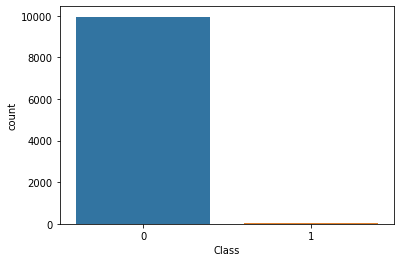

In [ ]:
import seaborn as sns
sns.countplot(x="Class",data=cc)

### Check the columns present in the dataset

In [ ]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Check the shape of the dataset

In [ ]:
cc.shape

(10000, 31)

### Check the descriptive statistics of the given dataset

In [ ]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


In [ ]:
cc[cc['Amount']>2000]['Class'].value_counts()

0    10
Name: Class, dtype: int64

In [ ]:
# System Design Point [ System Design of ML Models are very Important ]
 # Architectural View of Problem Statement 
      # Where in you ar an expert on ML/DL - - Your goal is to be an expert in ML/DL/AI - However, be aware of other techstacks 
      # But you should Atleast know other technologies/componenents that are usually used 
            # Take top 10 WOrld LArget Internt COmpanies 
                #Amazon, Google, FB, Uber , Stitchfix , Linkedin, Netflix , TikTok , AirBnb, Swiggy(Engineering Blog - DS Blogs)
                # Spark, Kafka , AWS Infra, Azure Data Engineering, GCP Infra , Kuberflow , Docker 

# You are handling more than ~ 1 Million Transactions/Sec - Which means that your model should be able to predict at that scale?
# If i have to design a system fo Fraud PRediction 
    # can i just put a single trigger and say that only run prediction's on <50$ transactions ?

  # Maybe forst the first phase of my implemetation , so that my business and my customer get a flavour of new algo; i can restrcit my model to only specific amount 
  # have differnt model that is for high value transaction 
  #  Even before making that decision, you have to check how many values do we have in >10 $ 

### Check the info of the dataset

In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
Time      10000 non-null int64
V1        10000 non-null float64
V2        10000 non-null float64
V3        10000 non-null float64
V4        10000 non-null float64
V5        10000 non-null float64
V6        10000 non-null float64
V7        10000 non-null float64
V8        10000 non-null float64
V9        10000 non-null float64
V10       10000 non-null float64
V11       10000 non-null float64
V12       10000 non-null float64
V13       10000 non-null float64
V14       10000 non-null float64
V15       10000 non-null float64
V16       10000 non-null float64
V17       10000 non-null float64
V18       10000 non-null float64
V19       10000 non-null float64
V20       10000 non-null float64
V21       10000 non-null float64
V22       10000 non-null float64
V23       10000 non-null float64
V24       10000 non-null float64
V25       10000 non-null float64
V26       10000 non-null float64
V27

<a id=section4></a>

## 4. Data Interpretation and Visualization

### Check for the missing value present in the dataset

In [ ]:
cc.isnull().sum().any()

False

### Check the class variable using pie chart

Class as pie chart:


Text(0, 0.5, '')

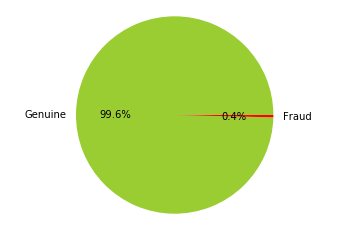

In [ ]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(cc.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

### Plot histogram to see if there is any trend in Time variable

Time variable
9995    4.166944
9996    4.167778
9997    4.168889
9998    4.169444
9999    4.170000
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

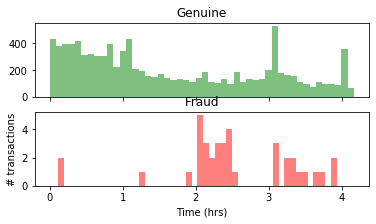

In [ ]:
#plot Time to see if there is any trend
print("Time variable")
cc["Time_Hr"] = cc["Time"]/3600 # convert to hours
print(cc["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(cc.Time_Hr[cc.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(cc.Time_Hr[cc.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [ ]:
! pip install plotly_express

In [ ]:
cc['Class'].astype("object")

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Class, Length: 10000, dtype: object

In [ ]:
import plotly_express as px
cc['Class']= cc['Class'].astype("object")
cc['Time'] = cc['Time']/3600
# i want to see amount, time & Fraud 
px.scatter(cc, x="Time", y="Amount", color="Class")


In [ ]:
#@Ranjhit
px.scatter(cc, x="Time", y="Amount", size="Amount", color="Class",
           hover_name="Amount", log_x=True, size_max=20)

In [ ]:
px.scatter_matrix(cc[['V1','V2','V3','Time','Amount','Class']],color="Class")

### Observations:

This "Time" feature shows that rate of transactions is picking up during day time. But number of transactions have almost similar dependence on time of the day for both the classes.  So, I believe this feature does not yield any predictive power to distinguish between the two classes. But ofcourse we will later test this assumption. For now, I'll keep this feature in data frame. We will drop "Time".

In [ ]:
cc = cc.drop(['Time'],axis=1)

### Plot histogram to check Amount variable

Text(0,0.5,'# transactions')

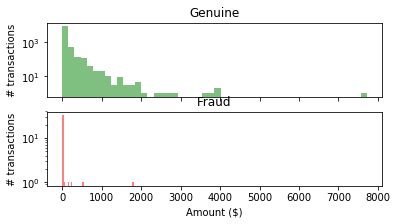

In [ ]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(cc.Amount[cc.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(cc.Amount[cc.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

interesting to note "all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components. So, I'll standardize the values of the 'Amount' feature using StandardScalar and save in data-frame for later use.

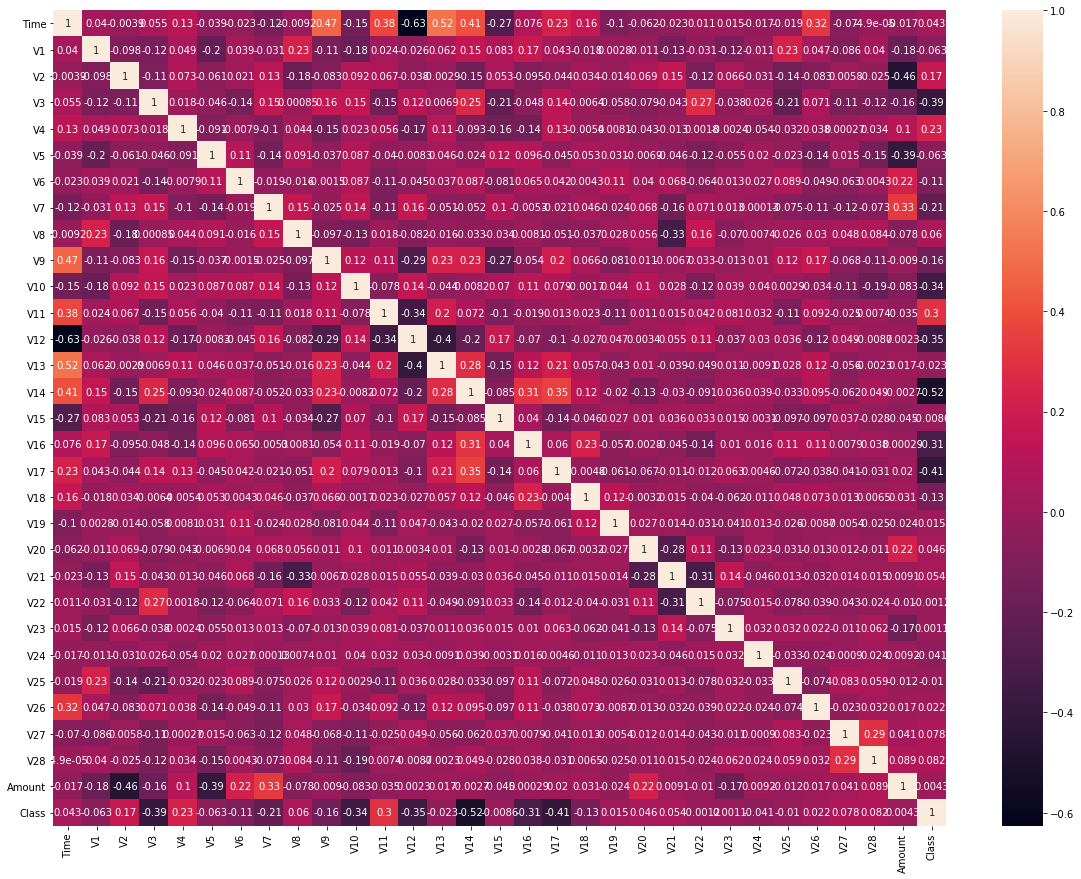

In [ ]:
# Seaborn Heatmap that show coorelations 
import seaborn as sns
plt.figure(figsize = (20,15))
sns.heatmap(cc.corr(),annot=True)

In [ ]:
cc.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.040220,-0.003892,0.055055,0.130669,-0.038572,-0.022782,-0.124929,-0.009227,0.469687,-0.147243,0.376129,-0.625646,0.517830,0.408905,-0.272042,0.075949,0.229869,0.156288,-0.100925,-0.062392,-0.023008,0.010920,0.014915,-0.017272,-0.019342,0.316069,-0.070044,-0.000049,-0.017218,0.042762
V1,0.040220,1.000000,-0.097724,-0.121651,0.048906,-0.195764,0.039366,-0.030594,0.229876,-0.112812,-0.183000,0.024134,-0.025948,0.062048,0.154210,0.082548,0.168851,0.042545,-0.018274,0.002769,-0.010867,-0.127610,-0.031425,-0.116673,-0.010840,0.229927,0.046926,-0.086065,0.039544,-0.179395,-0.063109
V2,-0.003892,-0.097724,1.000000,-0.110161,0.073169,-0.061484,0.020603,0.128664,-0.175978,-0.082691,0.091575,0.067378,-0.038322,-0.002920,-0.150185,0.053038,-0.094555,-0.044265,0.034434,-0.014130,0.068572,0.146151,-0.121138,0.066026,-0.030688,-0.143618,-0.082603,0.005770,-0.024787,-0.463937,0.166618
V3,0.055055,-0.121651,-0.110161,1.000000,0.017932,-0.045608,-0.135680,0.154046,0.000853,0.159135,0.150053,-0.154416,0.121509,0.006905,0.254165,-0.210118,-0.047838,0.135065,-0.006361,-0.058424,-0.078981,-0.043062,0.273281,-0.037822,0.026395,-0.214339,0.071371,-0.113966,-0.117349,-0.162458,-0.390122
V4,0.130669,0.048906,0.073169,0.017932,1.000000,-0.091374,-0.007930,-0.101019,0.043785,-0.145626,0.023243,0.055839,-0.168405,0.107716,-0.092682,-0.160276,-0.143538,0.132589,-0.005389,0.008096,-0.042623,-0.012613,0.001773,-0.002442,-0.054253,-0.032193,0.038373,0.000274,0.034047,0.104773,0.229448
V5,-0.038572,-0.195764,-0.061484,-0.045608,-0.091374,1.000000,0.110955,-0.139896,0.090985,-0.037047,0.087349,-0.040240,-0.008333,0.045677,-0.024011,0.117438,0.096470,-0.044840,0.052850,0.031491,-0.006895,-0.045869,-0.115156,-0.054986,0.020278,-0.023284,-0.138153,0.014845,-0.149219,-0.390725,-0.062717
V6,-0.022782,0.039366,0.020603,-0.135680,-0.007930,0.110955,1.000000,-0.019390,-0.015609,-0.001543,0.087286,-0.105822,-0.045194,0.036634,0.087151,-0.081364,0.065008,0.041729,0.004325,0.105411,0.040162,0.068064,-0.064290,0.013235,0.026933,0.088973,-0.049399,-0.062792,0.004313,0.220732,-0.106040
V7,-0.124929,-0.030594,0.128664,0.154046,-0.101019,-0.139896,-0.019390,1.000000,0.149162,-0.025105,0.141523,-0.114528,0.162665,-0.050838,-0.052439,0.101651,-0.005260,-0.021267,0.045848,-0.023866,0.068087,-0.155986,0.070590,0.013081,0.000126,-0.074627,-0.110700,-0.118736,-0.072621,0.327200,-0.212425
V8,-0.009227,0.229876,-0.175978,0.000853,0.043785,0.090985,-0.015609,0.149162,1.000000,-0.097410,-0.130051,0.018135,-0.082360,-0.015965,-0.032924,-0.033809,0.008122,-0.050633,-0.036527,0.027693,0.056105,-0.325642,0.159203,-0.070183,0.007444,0.025635,0.029797,0.047551,0.083996,-0.078267,0.059615
V9,0.469687,-0.112812,-0.082691,0.159135,-0.145626,-0.037047,-0.001543,-0.025105,-0.097410,1.000000,0.117381,0.112918,-0.290738,0.233577,0.228090,-0.265978,-0.054229,0.201666,0.065925,-0.081208,0.011384,-0.006749,0.033389,-0.013198,0.010285,0.120004,0.171552,-0.068005,-0.109917,-0.008965,-0.164610


In [ ]:
# Assignment / Revision Point 

 ## Create a defination that can just take threshold (0.4), then it should just plot (heatmap) those which are agreeing to the threshold and gives us the list of columns 
 

In [ ]:
#@PAras
cr = cc[cc.corr().between(-0.4, 0.4)]

AttributeError: ignored

In [ ]:
# subset all columns whihc are corr>0.6 or cor<-0.6 


#@Raj 
cc.corr().Class.sort_values(ascending=False)

Class     1.000000
V11       0.297231
V4        0.229448
V2        0.166618
V28       0.081831
V27       0.078159
V8        0.059615
V21       0.053662
V20       0.046082
Time      0.042762
V26       0.022224
V19       0.015076
Amount    0.004252
V23       0.001114
V22      -0.001170
V15      -0.008601
V25      -0.009965
V13      -0.023003
V24      -0.040781
V5       -0.062717
V1       -0.063109
V6       -0.106040
V18      -0.129729
V9       -0.164610
V7       -0.212425
V16      -0.310866
V10      -0.344365
V12      -0.351070
V3       -0.390122
V17      -0.407361
V14      -0.517690
Name: Class, dtype: float64

In [ ]:
cc[(cc.corr() < -0.4) & (cc.corr() > 0.4)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#@Dhaval 
#one way is to replace values that are between 0.4 and -.4 as 0 and plot the rest

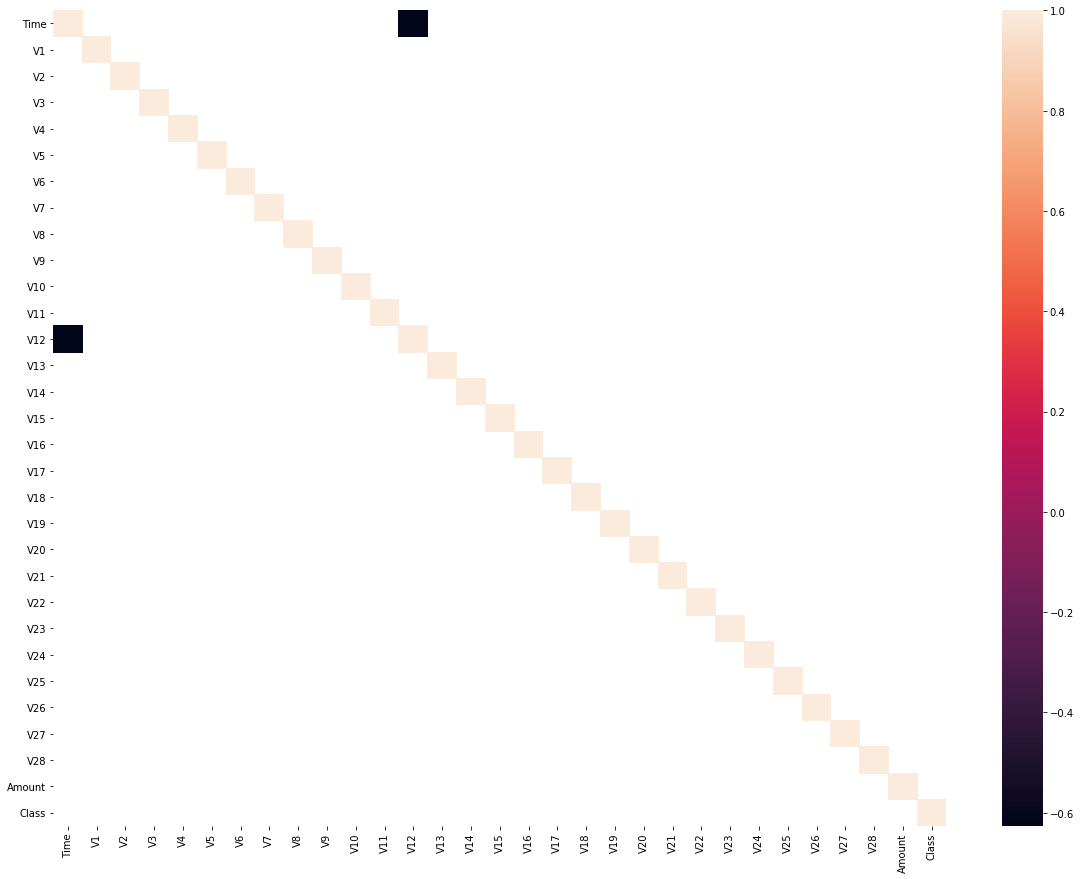

In [ ]:
#@Ishant
threshold = 0.6
ccr = cc.corr()
df =  ccr[(ccr > threshold) | (ccr < -threshold)]
# to get the pairs of correlated columns 
plt.figure(figsize = (20,15))
sns.heatmap(df)

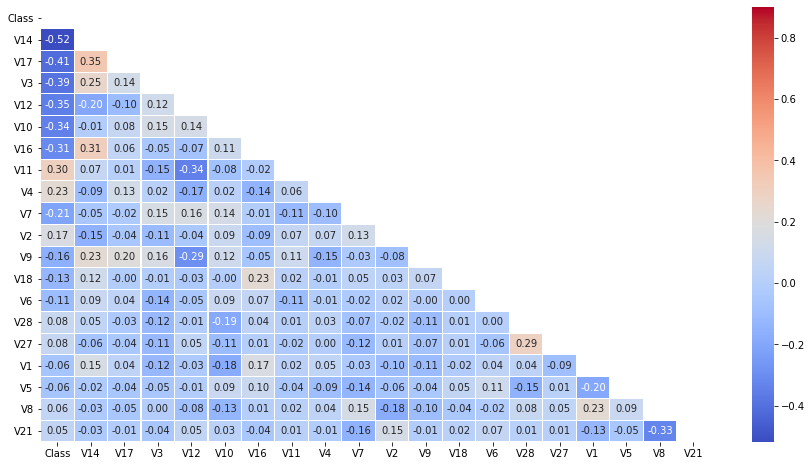

In [ ]:
#@Uday's 
#7 largest corr (abs values)
target = 'Class'

corr = cc.corr()
corr_abs = corr.abs()

nr_num_cols = 20

cols = corr_abs.nlargest(nr_num_cols, target)[target].index
cm = np.corrcoef(cc[cols].T)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, annot=True, cmap = 'coolwarm', vmax=.9, linecolor='white', linewidths=.1, mask=mask,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [ ]:
from sklearn.preprocessing import StandardScaler
cc['scaled_Amount'] = StandardScaler().fit_transform(cc['Amount'].values.reshape(-1,1))
cc = cc.drop(['Amount'],axis=1)

C:\Users\mrshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


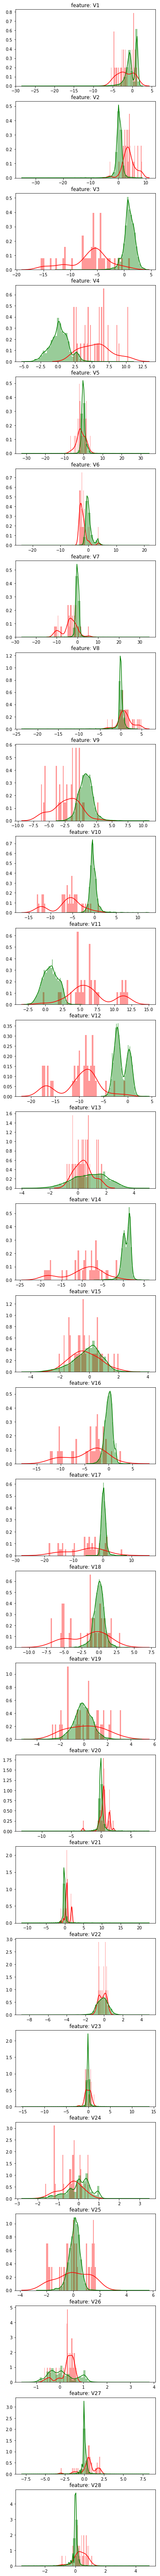

In [ ]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cc[cc.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class == 1], bins=50, color='r')
    sns.distplot(cc[col][cc.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

For some of the features, both the classes have similar distribution. So, I don't expect them to contribute towards classifying power of the model. So, it's best to drop them and reduce the model complexity, and hence the chances of overfitting. Ofcourse as with my other assumptions, I will later check the validity of above argument.

Now, it's time to split the data in test set (20%) and training set (80%). I'll define a function for it.

<a id=section5></a>

## 5. Train test split

<a id=section501></a>
#### 5.1 User defined function to split the dataset into train and test

In [ ]:
# dataframe , drop_list (columns that you would like to drop or not take as part of analysis )
def split_data(cc, drop_list):
    cc = cc.drop(drop_list,axis=1)
    print(cc.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = cc['Class'].values #target
    X = cc.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

# CC -> 99.9 vs 0.01 % 
# Train - Test --> SHould also have the same split as that is there in the original data 
# when you have huge imabalnce just like 98-2, 99-1 kind , then stratify is important 


Below is funtion to define classifier and get predictions.
We can use "predict()" method that checks whether a record should belong to "Fraud" or "Genuine" class.
There is another method "predict_proba()" that gives the probabilities for each class. It helps us to learn the idea of changing the threshold that assigns an instance to class 1 or 0, thus we can control precision and recall scores. This would be used to calculate area under ROC.

<a id=section502></a>
#### 5.2 User defined function to fit and predict the model

In [ ]:
# clf is just the model object which you have to pass to this function. You can choose any model 
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

<a id=section503></a>
#### 5.3 User defined function to print the classifier score

In [ ]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print ("The Classification Report: \n", classification_report(y_test, y_pred))
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

<a id=section6></a>
## 6. Modelling and prediction

<a id=section601></a>
## 6.1 Gaussian Naive Bayes

<a id=section602></a>
### 6.1.1 Case-NB-1 : do not drop anything

In [ ]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [ ]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7915   55]
 [   1   29]]


In [ ]:
#Recall ~ 1/FP
#Precision ~ 1/FP 
# 0 ->  
# 1 ->  
# FN ->  class assumed as  --> 1
# FP ->  Class assumed as   -> 25 

# Precision (CLass: 1) = 0.22 --> TP/FP+TP.; Our FP is very High, Hence our Precision is Very Low 
# Recall (Clas: 1) = 0.88   -> TP/TP+FN ;  Becuase, FN is very Low, Recall will be very High 



# 25 & 1 ( we nee dot know which is FP and which is FN )
#Recall ~ 1/FN
#Precision ~ 1/FP 

FN has to be lesss compared to FP 
FN <<< FP 
1 <<<< 25 

Recall High ---> FN are very small -->  It is negative (Fraud), but model is saying positive(Non_Fraud).  - You are optimizing your loss 
Precision Low --> FP are very High ---> It is postive (Non_Fraud), but our model is saying negative (Fraud). - - You loose custover value here!


# whenever the precision is higher --> it's doing too much error because of confusion 
# while the recall is higher signifies that 88% of records were predicted correctly 

In [ ]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1967   25]
 [   1    7]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1992
           1       0.22      0.88      0.35         8

    accuracy                           0.99      2000
   macro avg       0.61      0.93      0.67      2000
weighted avg       1.00      0.99      0.99      2000

recall score:  0.875
precision score:  0.21875
f1 score:  0.35
accuracy score:  0.987
ROC AUC: 0.9830572289156626


In [ ]:
# These condiitons are also very important because they act as a cut-off parameter while testing many models 


# Algorithms --> Parameters 
    # GrdiSearchCV 
     # IS there any intelligence when GridSearch does any experiments of parameters? 
     # 

# whule there could be thousands of experiments, we need to figure out different ways to optmize it, such that, 
# we don't exploit time and computation? 
     # Prodction 
     for eachALgo in AllALgo:
       for EachParam in ParamList: 
         Check Recall:
         if recall >= 88%:
           THen go ahead and do other experiment 
           Do the experiment where Precision > 50 % 

# THis is an productive and fast way to create models
# That your client mentions the P&R Targets 
    Target for P & R is fixed 
    I can now use all aglo's and their params and see which one of them gives me anythign near that target 

    We let this experiment run in parallel and we create a dashbaord (log) that tracks each of these ecperiments 


In [ ]:
# This is your direction of next experiemnts 
  # Keep the FN as it is - don not change it ---  we should not go lesser than 88% 
  # Reduce the FP as much as you can !

In [ ]:
# Revision/Assignment POint 
# can we caluclate based on this model, how much money were able to save?
 # Take model, predict train + test 
 # subset cases where prediction & actual is same and class==1 
 # then just sum the amount column

In [ ]:
# this is not C-Level Report --- 
# Right after this first basic analysis, here are things that you will write in the report 
    # Create Notebook Presentation/Dashboard of Data - Data Understanding 
    # Data Assumptions 
    # Data Pre-Processing 
    # Model Analysis 
    # Error Analysis 
      # FP, FN, Precision , Recall 
    # Open Question 

# C-Lvel Reports --> Business Implications of your Model/Analysis --> There's should be no code 
# You should demonstrate Technical Power in single slide 
# Project Managment Details - Resources, TImelines, Costing, benfits 
# Recall High ---> FN are very small -->  It is negative (Fraud), but model is saying positive(Non_Fraud).  - You are optimizing your loss 
# Precision Low --> FP are very High ---> It is postive (Non_Fraud), but our model is saying negative (Fraud). - - You loose custover value here!


In [ ]:
# How do you know if the subset's/samples/splits/dropping <anychange> of columns are going to be generialized when it comes to prediction only when 
# you do enough iterations or subsampling of results to make sure that you get least SDev of results 

In [ ]:
# Data --> 80 - 20 (Random) ---> SimpleML Algo ----> a1 
# How do i know this stable?
# Classification 
# Data --> 80 - 20 (Random) ---> SimpleML Algo (LogReg) ----> a1 --- iteration 1
# Data --> 80 - 20 (Random) ---> SimpleML Algo ----> a2 --- -iteration 2 
# Data --> 80 - 20 (Random) ---> SimpleML Algo ----> a3  --- iteration 3 
If SandardDev (a1, a2, a3) is large ---then model is not stable , which means that <change in data> is not consitent - which means your data has a huge variance 
# How do you make your mdoels robust/stable 
# Do Cross Validation - inner Itration 
# Do outer Iteration of whole ML Cycle multiple time (~5-10) and check StandarDeviation of accuracy
@ Outer Iteration 
# MLOps 
  # Feature Store 
  # Logic Store (You will write your experiemnts and save them as modules, 
  #   such that with any data change or new data, your whole experiemtns/pipeline can run automatically)
  # DVC, Metaflow, MlFlow, Airflow - Python 


<a id=section603></a>
### 6.1.2 Case-NB-2 : drop some of principle components that have similar distributions in above plots 

In [ ]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'] # they are similar from distribution point of view 
# another way to know which columns to drop is the heatmap function that we have written before

X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [ ]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7931   39]
 [   1   29]]


In [ ]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1971   21]
 [   1    7]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1992
           1       0.25      0.88      0.39         8

    accuracy                           0.99      2000
   macro avg       0.62      0.93      0.69      2000
weighted avg       1.00      0.99      0.99      2000

recall score:  0.875
precision score:  0.25
f1 score:  0.3888888888888889
accuracy score:  0.989
ROC AUC: 0.9033320783132529


### Observations:

Clearly, by removing some of the reduntant principle components, I gain in model sensitivity and precision.

<a id=section604></a>
### 6.1.3 Case-NB-3 : drop some of principle components + Time 

In [ ]:
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [ ]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7931   39]
 [   1   29]]


In [ ]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1971   21]
 [   1    7]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1992
           1       0.25      0.88      0.39         8

    accuracy                           0.99      2000
   macro avg       0.62      0.93      0.69      2000
weighted avg       1.00      0.99      0.99      2000

recall score:  0.875
precision score:  0.25
f1 score:  0.3888888888888889
accuracy score:  0.989
ROC AUC: 0.9033320783132529


### Observations:

As we can see by comapring Case-NB-3 scores with Case-NB-2 scores, "Time_Hr" is not helping much in classification. So, I can remove it safely.

<a id=section605></a>
### 6.1.4 Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'

In [ ]:
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [ ]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7926   44]
 [   1   29]]


In [ ]:
# Now that we have seen recall to be 100%, atleast we know that it is possible 

In [ ]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1968   24]
 [   0    8]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1992
           1       0.25      1.00      0.40         8

    accuracy                           0.99      2000
   macro avg       0.62      0.99      0.70      2000
weighted avg       1.00      0.99      0.99      2000

recall score:  1.0
precision score:  0.25
f1 score:  0.4
accuracy score:  0.988
ROC AUC: 0.9982429718875502


### Observations:

I would say, Case-NB-4 gives me better model sensitivity (or recall) and precision as compared to Case-NB-1. So dropping some of redundant feature will ofcourse helps to make calculations fast and gain senstivity.

In [ ]:
cc = cc.drop(drop_list,axis=1)
print(cc.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


<a id=section606></a>
### 6.2 Using Logistic Regression

Let us now do the predictions with another classifier: logistic regression

My aim is to compare the performance i.e. recall score of GaussianNB() with recall score of logistic regressor for test dataset (which is 20% of full dataset, selected above).

I'll start with running 
- default logistic regressor 
- for full imbalanced dataset (I know it is a bad approach, but this is just to get rough estimate) 
        - that has been splitted into train-test subsets (80:20),  case-4 above.

<a id=section607></a>
### 6.2.1 Case-LR-1

In [ ]:
# in Naive Bayes -- We weren't able to increase precision ~ FP more than 25-30-% Range 
# However, for Logistic Regression, we got 100% precision ~ all FP =0, but recall has been reduced 

# General Comment 
# Naive Bayes - since it's not a parameteric model - it creates a confusion while understanding overlap cases 
# If you have too much Bias of a specific class, it may not be a good idea to use Naive Bayes since you will mostly suffer from lower precisions 
# When we have so much bias or soo much imbalance - it's better to use parameteric models 

# Can we not combine both the models?  ----> Model Stacking ---> XGBoost || Model Ensemble || Random Forest 

In [ ]:
# let us check recall score for logistic regression
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[7970    0]
 [   5   25]]
test-set confusion matrix:
 [[1992    0]
 [   2    6]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000

recall score:  0.75
precision score:  1.0
f1 score:  0.8571428571428571
accuracy score:  0.999
ROC AUC: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Revision Point 
# Try this experiment with other basic models (D,tree,RF, KNN and compare with NaiveBayes ) 
# make your conculsion in the notebook 

### Observations:

As we see, by learning from full imbalanced dataset this default logistic regressor performs very poorly. So let us try to train it in tradional way i.e. from under-sampled data.

### Lets take only that percent of genuine-class cases which is equal to all fraud-classes i.e. consider 50/50 ratio of both classes.

In [ ]:
# get indices for fraud and genuine classes 
fraud_ind = np.array(cc[cc.Class == 1].index)
gen_ind = cc[cc.Class == 0].index  # indexs of all non fraud cases in dataframe
n_fraud = len(cc[cc.Class == 1])  # total number of fraud cases 
# random selection from genuine class
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False) # pick total number of nonfraud cases === len(fraud_cases)
random_gen_ind = np.array(random_gen_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
# Under sample dataset
undersample_cc = cc.iloc[under_sample_ind,:]
y_undersample  = undersample_cc['Class'].values #target
X_undersample = undersample_cc.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_cc))
print("% genuine transactions: ",len(undersample_cc[undersample_cc.Class == 0])/len(undersample_cc))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_cc))

# transactions in undersampled data:  76
% genuine transactions:  0.5
% fraud transactions:  0.5


In [ ]:
# This is UPSAMPLING Example 
factor_to_replicate = 200
cc_copy.append(pd.concat([cc_fraud]*factor_to_replicate, ignore_index=True) ,ignore_index=True)['Class'].value_counts()
drop_list = []
X_train, X_test, y_train, y_test = split_data(cc_copy, drop_list)
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

# Revision Point /Assignment 
# Do Naive Bayes and check ; Also Try outer Iterations and check for StDev 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8
train-set confusion matrix:
 [[7970    0]
 [   5   25]]
test-set confusion matrix:
 [[1992    0]
 [   2    6]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000

recall score:  0.75
precision score:  1.0
f1 score:  0.8571428571428571
accuracy score:  0.999
ROC AUC: 1.0


In [ ]:
# This is an example of Outer Iteration Logic
import warnings
warnings.filterwarnings('ignore')
def getData(cc):
  # get indices for fraud and genuine classes 
  fraud_ind = np.array(cc[cc.Class == 1].index)
  gen_ind = cc[cc.Class == 0].index  # indexs of all non fraud cases in dataframe
  n_fraud = len(cc[cc.Class == 1])  # total number of fraud cases 
  # random selection from genuine class
  random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False) # pick total number of nonfraud cases === len(fraud_cases)
  random_gen_ind = np.array(random_gen_ind)
  # merge two class indices: random genuine + original fraud
  under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
  # Under sample dataset
  undersample_cc = cc.iloc[under_sample_ind,:]
  y_undersample  = undersample_cc['Class'].values #target
  X_undersample = undersample_cc.drop(['Class'],axis=1).values #features
  return undersample_cc

# dataframe , drop_list (columns that you would like to drop or not take as part of analysis )
def split_data(cc, drop_list):
    cc = cc.drop(drop_list,axis=1)
    # print(cc.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = cc['Class'].values #target
    X = cc.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

    # print("train-set size: ", len(y_train),
    #   "\ntest-set size: ", len(y_test))
    # print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

# CC -> 99.9 vs 0.01 % 
# Train - Test --> SHould also have the same split as that is there in the original data 
# when you have huge imabalnce just like 98-2, 99-1 kind , then stratify is important 


def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    # print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

def print_scores(y_test,y_pred,y_pred_prob):
    # print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    # print ("The Classification Report: \n", classification_report(y_test, y_pred))
    # print("recall score: ", recall_score(y_test,y_pred))
    # print("precision score: ", precision_score(y_test,y_pred))
    # print("f1 score: ", f1_score(y_test,y_pred))
    # print("accuracy score: ", accuracy_score(y_test,y_pred))
    # print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    return (recall_score(y_test,y_pred), precision_score(y_test,y_pred))

precision = []
recall = []
for i in range(100):
  undersample_cc = getData(cc)
  drop_list = []

  X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_cc, drop_list)
  y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2'), X_und_train, y_und_train, X_und_test)
  recall_value, precision_value = print_scores(y_und_test,y_und_pred,y_und_pred_prob)
  precision.append(precision_value)
  recall.append(recall_value)

import numpy as np 
print ("Stdev for Precision : ", np.std(precision))
print ("Stdev for Recall : ", np.std(recall))

Stdev for Precision :  0.0
Stdev for Recall :  0.10132713111501777


<a id=section608></a>
### 6.2.2 Case-LR-2

In [ ]:
# let us train logistic regression with undersamples data
# split undersampled data into 80/20 train-test datasets. 
# - Train model from this 80% fraction of undersampled data, get predictions from left over i.e. 20%.
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_cc, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2'), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  60 
test-set size:  16
fraud cases in test-set:  8
train-set confusion matrix:
 [[30  0]
 [ 1 29]]
test-set confusion matrix:
 [[8 0]
 [0 8]]
The Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

recall score:  1.0
precision score:  1.0
f1 score:  1.0
accuracy score:  1.0
ROC AUC: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Observations:

As per expectations, wonderfull performance for completely balanced classes.

Now, let us check its performance for the full skewed dataset. Just to mention: "train" from undersampled data, and "test" on full data.

<a id=section609></a>
### 6.2.3 Case-LR-3

In [ ]:
# "train" with undersamples, "test" with full data
# call classifier
lr = LogisticRegression(C = 0.01, penalty = 'l1')
# fit it to complete undersampled data
lr.fit(X_undersample, y_undersample)
# predict on full data
y_full = cc['Class'].values #target
X_full = cc.drop(['Class'],axis=1).values #features
y_full_pred = lr.predict(X_full)
# Compute predicted probabilities: y_pred_prob
y_full_pred_prob = lr.predict_proba(X_full)
print("scores for Full set")   
print('test-set confusion matrix:\n', confusion_matrix(y_full,y_full_pred)) 
print("recall score: ", recall_score(y_full,y_full_pred))
print("precision score: ", precision_score(y_full,y_full_pred))

scores for Full set
test-set confusion matrix:
 [[7775 2187]
 [   0   38]]
recall score:  1.0
precision score:  0.01707865168539326


### Observations

I just want to compare the scores from GaussianNB with logistic-regression. 
- get predictions for test-dataset (20% of full dataset) from both models.

Aim is to compare recall score of Case-NB-4 with Case-LR-4.

<a id=section610></a>
### 6.2.4 Case-LR-4

In [ ]:
y_p20_pred = lr.predict(X_test)
y_p20_pred_prob = lr.predict_proba(X_test)
print("scores for test (20% of full) set")   
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_p20_pred)) 
print("recall score: ", recall_score(y_test,y_p20_pred))
print("precision score: ", precision_score(y_test,y_p20_pred))

scores for test (20% of full) set
test-set confusion matrix:
 [[1578  414]
 [   0    8]]
recall score:  1.0
precision score:  0.018957345971563982


### Observations:

So, now I have NB vs LR recall score of 0.878 vs 0.929. 

NB confusion matrix:

 [[55954   910]
 [   12    86]]
 
 LR confusion matrix:
 
 [[53547  3317]
 [    7    91]]

<a id=section7></a>

## 7. Conclusions

Nodoubt, __LR gives better model sensitivity__, but __positive predictive value for NB is more than double (although low for both)__. 
- As said in introduction, Naive-Bayes is just __simple prob. calculator__, __no coeff. optimization by fitting__ etc. , so this is __quick learner__. 
- We can hopefully improve NB's performance by playing around with default threshold on calculated probabilities, but still __89% of fraud cases are detected__, bravo NB!